In [1]:
import numpy as np
import pandas as pd

In [3]:
dfa = pd.read_csv("adult.data.csv")

In [4]:
dfa.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
dfa.shape

(32561, 15)

In [6]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
dfa["sex"].value_counts() #Первый ответ: Мужчин - 21790, женщин - 10771

Male      21790
Female    10771
Name: sex, dtype: int64

In [15]:
round(dfa[dfa["sex"] == "Female"]["age"].mean(), 2) #Второй ответ: Средний возраст женщин 36,86лет

36.86

In [18]:
dfa.loc[dfa["sex"] == "Female", "age"].mean() #Второй, как в ответе 

36.85823043357163

In [17]:
len(dfa[dfa["native-country"] == "Germany"]) / len(dfa['native-country']) * 100 #Третий: можно и не умножать на 100

0.42074874850281013

In [22]:
float((dfa["native-country"] == "Germany").sum()) / dfa.shape[0] #Третий, как в ответе

0.004207487485028101

In [24]:
dfa.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [44]:
round(dfa.groupby("salary")["age"].agg([np.mean, np.std])) #Четвертый & 5, среднее и ст.отклонение лет по группам.

,mean,std
salary,,
<=50K,37.0,14.0
>50K,44.0,11.0


In [55]:
def ed_cat(education):
    return "hi-level" if education == "Bachelors" or education == "Prof-school" or education == "Assoc-acdm"\
or education == "Assoc-voc" or education == "Masters" or education == "Doctorateelse" else "low-lewel"

In [56]:
ed_cats = [ed_cat(education) for education in dfa.education]

In [57]:
dfa["ed categ"] = ed_cats

In [58]:
import matplotlib.pyplot as plt

In [59]:
import seaborn as sns

In [60]:
%config InlineBackend.figur_format = "retina"

<AxesSubplot:xlabel='salary', ylabel='count'>

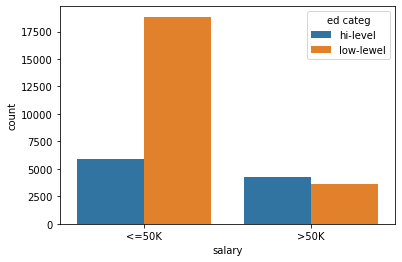

In [62]:
sns.countplot(x = "salary", hue = "ed categ", data = dfa)
#Шестое наглядно, больше 50тыс, примерно одинаково по образованию

In [69]:
dfa[dfa.sex == "Male"].groupby("race")["age"].describe()#7 по одному, быстро

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,192.0,37.208333,12.049563,17.0,28.0,35.0,45.0,82.0
Asian-Pac-Islander,693.0,39.073593,12.883944,18.0,29.0,37.0,46.0,90.0
Black,1569.0,37.682600,12.882612,17.0,27.0,36.0,46.0,90.0
Other,162.0,34.654321,11.355531,17.0,26.0,32.0,42.0,77.0
White,19174.0,39.652498,13.436029,17.0,29.0,38.0,49.0,90.0


In [70]:
dfa[dfa.sex == "Female"].groupby("race")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,119.0,37.117647,13.114991,17.0,27.0,36.0,46.00,80.0
Asian-Pac-Islander,346.0,35.089595,12.300845,17.0,25.0,33.0,43.75,75.0
Black,1555.0,37.854019,12.637197,17.0,28.0,37.0,46.00,90.0
Other,109.0,31.678899,11.631599,17.0,23.0,29.0,39.00,74.0
White,8642.0,36.811618,14.329093,17.0,25.0,35.0,46.00,90.0


In [71]:
dfa.groupby("race")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27816.0,38.769881,13.782306,17.0,28.0,37.0,48.0,90.0


In [75]:
dfa.pivot_table(["age"], ["race", "sex"], aggfunc = "describe") #7, вот так вся картина!!! Муж. макс. Эскимо 82года 

age                                               \
                            25%   50%    75%    count   max       mean   min   
race               sex                                                         
Amer-Indian-Eskimo Female  27.0  36.0  46.00    119.0  80.0  37.117647  17.0   
                   Male    28.0  35.0  45.00    192.0  82.0  37.208333  17.0   
Asian-Pac-Islander Female  25.0  33.0  43.75    346.0  75.0  35.089595  17.0   
                   Male    29.0  37.0  46.00    693.0  90.0  39.073593  18.0   
Black              Female  28.0  37.0  46.00   1555.0  90.0  37.854019  17.0   
                   Male    27.0  36.0  46.00   1569.0  90.0  37.682600  17.0   
Other              Female  23.0  29.0  39.00    109.0  74.0  31.678899  17.0   
                   Male    26.0  32.0  42.00    162.0  77.0  34.654321  17.0   
White              Female  25.0  35.0  46.00   8642.0  90.0  36.811618  17.0   
                   Male    29.0  38.0  49.00  19174.0  90.0  39.652498  17.0   

                                      
                                 std  
race               sex                
Amer-Indian-Eskimo Female  13.114991  
                   Male    12.049563  
Asian-Pac-Islander Female  12.300845  
                   Male    12.883944  
Black              Female  12.637197  
                   Male    12.882612  
Other              Female  11.631599  
                   Male    11.355531  
White              Female  14.329093  
                   Male    13.436029

In [76]:
dfa.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary categ,ed categ
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,poor,hi-level
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,poor,hi-level


In [79]:
def ms_cat(ms):
    return "married" if ms == "Married-civ-spouse" or ms == "Married-spouse-absent" or ms == "Married-AF-spouse"\
                   else "never-mar"
ms_cats = [ms_cat(ms) for ms in dfa["marital-status"]]

In [80]:
dfa["ms categ"] = ms_cats

<AxesSubplot:xlabel='salary categ', ylabel='count'>

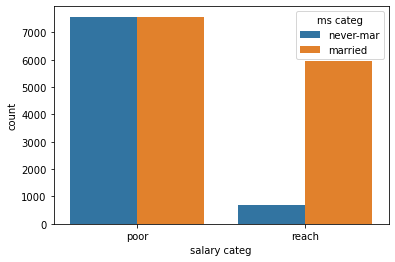

In [101]:
sns.countplot(x = "salary categ", hue = "ms categ", data = dfa[dfa.sex == "Male"]) 
#8, конечно, богатых мужчин больше женатых!

In [82]:
dfa.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary categ,ed categ,ms categ
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,poor,hi-level,never-mar
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,poor,hi-level,married
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,poor,low-lewel,never-mar
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,poor,low-lewel,married
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,poor,hi-level,married


In [84]:
dfa["hours-per-week"].max() #9, максимум работают 99 часов в неделю!

99

In [88]:
dfa[dfa["hours-per-week"] == dfa["hours-per-week"].max()].shape[0]#9, таких 85 человек

85

In [97]:
round(dfa[dfa["hours-per-week"] == dfa["hours-per-week"].max()]\
      ["salary categ"].value_counts(normalize = True)[1] * 100) #Из них 29% богатых

29

In [114]:
pd.set_option('display.max_rows', 100)

In [115]:
round(dfa.pivot_table(["hours-per-week"], ["native-country", "salary"], aggfunc = "mean"), 2)

hours-per-week
native-country             salary                
?                          <=50K            40.16
                           >50K             45.55
Cambodia                   <=50K            41.42
                           >50K             40.00
Canada                     <=50K            37.91
                           >50K             45.64
China                      <=50K            37.38
                           >50K             38.90
Columbia                   <=50K            38.68
                           >50K             50.00
Cuba                       <=50K            37.99
                           >50K             42.44
Dominican-Republic         <=50K            42.34
                           >50K             47.00
Ecuador                    <=50K            38.04
                           >50K             48.75
El-Salvador                <=50K            36.03
                           >50K             45.00
England                    <=50K            40.48
                           >50K             44.53
France                     <=50K            41.06
                           >50K             50.75
Germany                    <=50K            39.14
                           >50K             44.98
Greece                     <=50K            41.81
                           >50K             50.62
Guatemala                  <=50K            39.36
                           >50K             36.67
Haiti                      <=50K            36.33
                           >50K             42.75
Holand-Netherlands         <=50K            40.00
Honduras                   <=50K            34.33
                           >50K             60.00
Hong                       <=50K            39.14
                           >50K             45.00
Hungary                    <=50K            31.30
                           >50K             50.00
India                      <=50K            38.23
                           >50K             46.48
Iran                       <=50K            41.44
                           >50K             47.50
Ireland                    <=50K            40.95
                           >50K             48.00
Italy                      <=50K            39.62
                           >50K             45.40
Jamaica                    <=50K            38.24
                           >50K             41.10
Japan                      <=50K            41.00
                           >50K             47.96
Laos                       <=50K            40.38
                           >50K             40.00
Mexico                     <=50K            40.00
                           >50K             46.58
Nicaragua                  <=50K            36.09
                           >50K             37.50
Outlying-US(Guam-USVI-etc) <=50K            41.86
Peru                       <=50K            35.07
                           >50K             40.00
Philippines                <=50K            38.07
                           >50K             43.03
Poland                     <=50K            38.17
                           >50K             39.00
Portugal                   <=50K            41.94
                           >50K             41.50
Puerto-Rico                <=50K            38.47
                           >50K             39.42
Scotland                   <=50K            39.44
                           >50K             46.67
South                      <=50K            40.16
                           >50K             51.44
Taiwan                     <=50K            33.77
                           >50K             46.80
Thailand                   <=50K            42.87
                           >50K             58.33
Trinadad&Tobago            <=50K            37.06
                           >50K             40.00
United-States              <=50K            38.80
                           >50K             45.51
Vietnam                    <=50K   